# Домашнее задание №7. И снова Pandas
Задания опираются на материалы лекции.

In [ ]:
import pandas as pd
movies = pd.read_csv("movies_metadata.csv")
ratings = pd.read_csv("ratings_small.csv")
print(movies.head(1))
print(ratings.head(1))

   adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   

                               homepage   id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story  862  tt0114709                en   

  original_title                                           overview  ...  \
0      Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   

  release_date      revenue runtime                          spoken_languages  \
0   1995-10-30  373554033.0    81.0  [{'iso_639_1': 'en', 'name': 'English'}]   

     status  tagline      title  video vote_average vote_count  
0  Released      NaN  Toy Story  False          7.7     5415.0  

[1 rows x 24 columns]
   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144


<ipython-input-32-452075060bea>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv("movies_metadata.csv")


## Задание 1
Определите, сколько фильмов в датасете с незаполненным бюджетом (0 или nan).

In [ ]:
# Напишите свой код в данной ячейке
s1 = movies[movies['budget'].isna()]['budget'].count()
s2 = movies[movies['budget']=='0']['budget'].count()
print(s1)
print(s2)
print('Всего: '+str(s1+s2))

0
36573
Всего: 36573


## Задание 2
Как изменится поведение модели предсказания рейтинга по бюджету и популярности, если убрать все объекты с нулями?

In [ ]:
# Напишите свой код в данной ячейке
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

movies.id = pd.to_numeric(movies.id, errors='coerce').astype('Int64')
ratings.movieId = pd.to_numeric(ratings.movieId, errors='coerce').astype('Int64')
data = pd.merge(ratings, movies, left_on='movieId', right_on='id')
data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
data['popularity'] = pd.to_numeric(data['popularity'], errors='coerce')
data['popularity_to_budget'] = data['popularity']/(data['budget'] + 1)
model = LinearRegression()

# С нулями
X = data[['budget', 'popularity']]
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Без нулей
data = data[data['budget']!=0]
data = data.dropna(subset = ['budget'])
X = data[['budget', 'popularity']]
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.1257036207096143
Mean Squared Error: 1.0944140295786686


## Задание 3
Оставьте в оценках по фильму только среднюю оценку фильма, а не все оценки. Сделайте мердж, предсказывайте оценку, как в примере на лекции. Как изменится поведение модели?

In [ ]:
# Напишите свой код в данной ячейке
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data1 = data[data['rating'] == data['vote_average']]
model = LinearRegression()

X = data1[['budget', 'popularity']]
y = data1['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.011467550454085106


## Задание 4
Найдите все фильмы, которые были выпущены в тот же год, что и Матрица, имеют длину фильма в диапазоне +- 20 минут от длительности фильма Матрица.

In [ ]:
# Напишите свой код в данной ячейке
matrixYear = data[data['title']=='The Matrix'].iloc[0]['release_date'][:4]
matrixDuration = data[data['title']=='The Matrix'].iloc[0]['runtime']
data2 = data[(data['release_date'].str[:4] == matrixYear) & (data['runtime'] >= matrixDuration-20) & (data['runtime'] <= matrixDuration+20)]
print(data2)

       userId  movieId  rating  timestamp  adult belongs_to_collection  \
48          2      509     4.0  835355719  False                   NaN   
52          2      550     3.0  835356109  False                   NaN   
120         4     1073     5.0  949919372  False                   NaN   
124         4     1213     5.0  949895708  False                   NaN   
319         7     1073     3.0  851866744  False                   NaN   
...       ...      ...     ...        ...    ...                   ...   
44696     665     1073     5.0  992909099  False                   NaN   
44699     665     1213     4.0  995233253  False                   NaN   
44840     666      509     3.0  838921185  False                   NaN   
44897     667      509     3.0  847271685  False                   NaN   
44914     668     1213     5.0  993613359  False                   NaN   

         budget                                             genres  \
48     42000000  [{'id': 10749, 'name': '

## Задание 5
Визуализируйте информацию о числе оценок и о средей оценке пользователей о фильме, но только среди фильмом из предыдущего пункта.

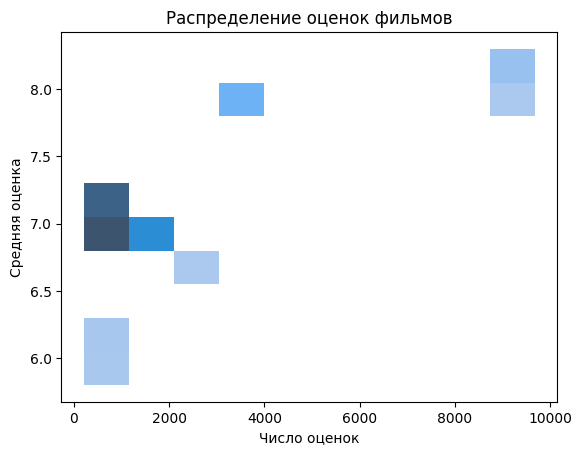

In [71]:
# Напишите свой код в данной ячейке
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = data2, x='vote_count', y='vote_average', bins=10)
plt.title("Распределение оценок фильмов")
plt.xlabel("Число оценок")
plt.ylabel("Средняя оценка")
plt.show()